In [8]:
# faceMask hDDM face ratings analysis script: mask analyses of false negatives (failing to ID correct emotion)
# 12/07/20

# note: to be run within python 3.5 environment named "hddm" (from console: 'source activate hddm')
# confirm jupyter notebook is launching from "hddm" environment (see top-right: 'conda env:hddm')

# set up
import numpy as np
print(np.__version__) # should be 1.11.3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from patsy import dmatrix

import hddm
print(hddm.__version__) # should be 0.6.0

1.11.1
0.6.0


In [9]:
# load hDDM-processed data from CSV file into a NumPy structured array
data = hddm.load_csv('faceMask2_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data = hddm.utils.flip_errors(data)

# check dataset
data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
0,lbmmswtrr0mpvov,0,3,surprised,0,_faces/HM08_F_X.jpg,HM08_F_X,HM08,H,M,fearful,baseline,1,2.248290,0,0,100,0,0,0
1,lbmmswtrr0mpvov,0,3,surprised,1,_faces/BM17_R_X.jpg,BM17_R_X,BM17,B,M,surprised,baseline,1,1.122130,0,0,0,0,0,100
2,lbmmswtrr0mpvov,0,3,surprised,2,_faces/WF05_S_X.jpg,WF05_S_X,WF05,W,F,sad,baseline,0,-1.093135,0,0,0,0,100,0
3,lbmmswtrr0mpvov,0,3,surprised,3,_faces/BM17_R_L.jpg,BM17_R_L,BM17,B,M,surprised,lower,1,1.347000,0,0,0,0,0,50
4,lbmmswtrr0mpvov,0,3,surprised,4,_faces/BF10_D_X.jpg,BF10_D_X,BF10,B,F,disgusted,baseline,0,-1.586875,0,100,0,0,0,0
5,lbmmswtrr0mpvov,0,3,surprised,5,_faces/BF15_F_L.jpg,BF15_F_L,BF15,B,F,fearful,lower,1,1.020070,0,0,50,0,0,0
6,lbmmswtrr0mpvov,0,3,surprised,6,_faces/AM07_S_X.jpg,AM07_S_X,AM07,A,M,sad,baseline,0,-1.092280,0,0,0,0,100,0
7,lbmmswtrr0mpvov,0,3,surprised,7,_faces/BF10_D_L.jpg,BF10_D_L,BF10,B,F,disgusted,lower,0,-1.574250,0,50,0,0,0,0
8,lbmmswtrr0mpvov,0,3,surprised,8,_faces/AM07_S_U.jpg,AM07_S_U,AM07,A,M,sad,upper,0,-1.219265,0,0,0,0,50,0
9,lbmmswtrr0mpvov,0,3,surprised,9,_faces/BM16_H_U.jpg,BM16_H_U,BM16,B,M,happy,upper,0,-1.092995,0,0,0,50,0,0


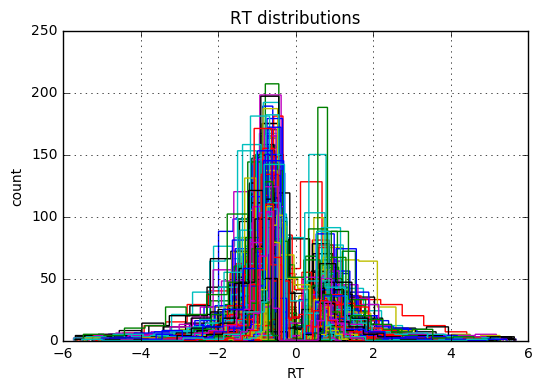

In [10]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [11]:
# subset dataset by emotion rating type (disgusted) and facial expression (angry)
da_data = data.loc[(data['emotionRating'] == 'disgusted') & (data['expression'] == 'angry')]
da_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
163,lbmmswtrr0mpvov,3,5,disgusted,163,_faces/AM04_A_L.jpg,AM04_A_L,AM04,A,M,angry,lower,0,-0.826710,50,0,0,0,0,0
166,lbmmswtrr0mpvov,3,5,disgusted,166,_faces/WF02_A_U.jpg,WF02_A_U,WF02,W,F,angry,upper,0,-2.604915,50,0,0,0,0,0
183,lbmmswtrr0mpvov,3,5,disgusted,184,_faces/AM04_A_U.jpg,AM04_A_U,AM04,A,M,angry,upper,0,-0.877020,50,0,0,0,0,0
194,lbmmswtrr0mpvov,3,5,disgusted,195,_faces/WF02_A_X.jpg,WF02_A_X,WF02,W,F,angry,baseline,0,-1.381780,100,0,0,0,0,0
201,lbmmswtrr0mpvov,3,5,disgusted,202,_faces/AM04_A_X.jpg,AM04_A_X,AM04,A,M,angry,baseline,0,-0.805480,100,0,0,0,0,0
204,lbmmswtrr0mpvov,3,5,disgusted,205,_faces/BM17_A_X.jpg,BM17_A_X,BM17,B,M,angry,baseline,0,-1.530560,100,0,0,0,0,0
206,lbmmswtrr0mpvov,3,5,disgusted,207,_faces/BM17_A_U.jpg,BM17_A_U,BM17,B,M,angry,upper,0,-0.860225,50,0,0,0,0,0
208,lbmmswtrr0mpvov,3,5,disgusted,209,_faces/BM17_A_L.jpg,BM17_A_L,BM17,B,M,angry,lower,0,-0.796120,50,0,0,0,0,0
209,lbmmswtrr0mpvov,3,5,disgusted,210,_faces/WF02_A_L.jpg,WF02_A_L,WF02,W,F,angry,lower,0,-1.250955,50,0,0,0,0,0
378,mr81dhy9r5lxu8r,1,6,disgusted,55,_faces/BM16_A_X.jpg,BM16_A_X,BM16,B,M,angry,baseline,1,1.228000,100,0,0,0,0,0


In [12]:
# drop any subjects missing columns in design matrix (otherwise produces error)
# none for da

In [13]:
# define model
m_da = hddm.HDDMRegressor(da_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 42248.2 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean         std        2.5q        25q        50q          75q       97.5q       mc err
a                                   1.62513   0.0393862     1.55098    1.59868    1.62451      1.65082     1.70634   0.00131568
a_std                              0.465721   0.0358301    0.399933   0.440842   0.464967     0.489399    0.538579   0.00140443
a_subj.09coqg8hlpux6fe              1.64418    0.357648     1.08411    1.38967    1.60002       1.8521     2.46445     0.008857
a_subj.0b3t2skj9mlhbkn              1.34451    0.222691     0.98144    1.18721    1.31668      1.47743     1.84635   0.00556109
a_subj.0bcg7mtj2n1jjw9              2.26023    0.324177     1.70852    2.02627    2.23276      2.46622     2.97393   0.00671221
a_subj.0s53r30oouek89b              2.11999    0.316271     1.60059    1.89559    2.08814      2.30858     2.83072   0.00619746
a_subj.0uj9gbhag3o1w1v              1.72805    0.275384     1.26617    1.52918     1.7036       1.8997  

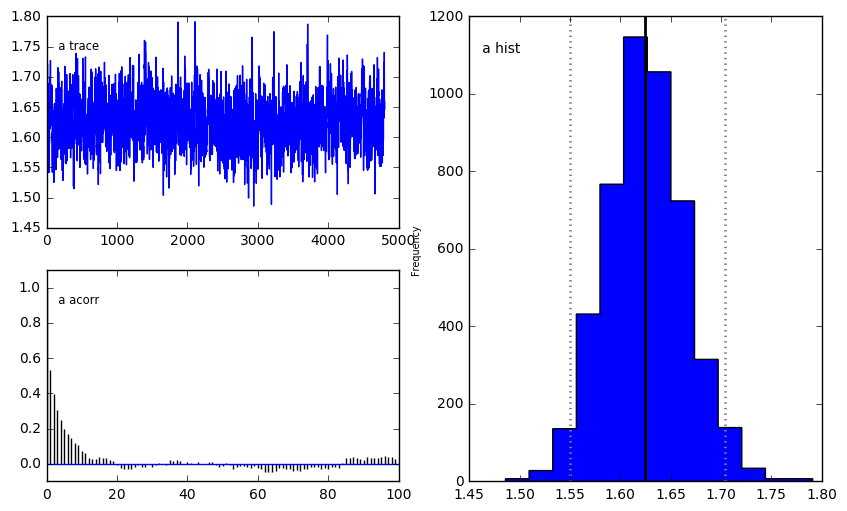

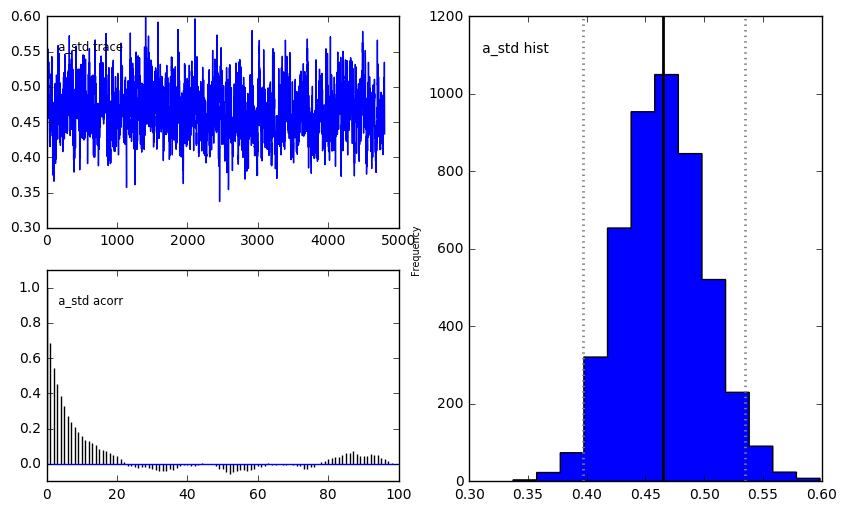

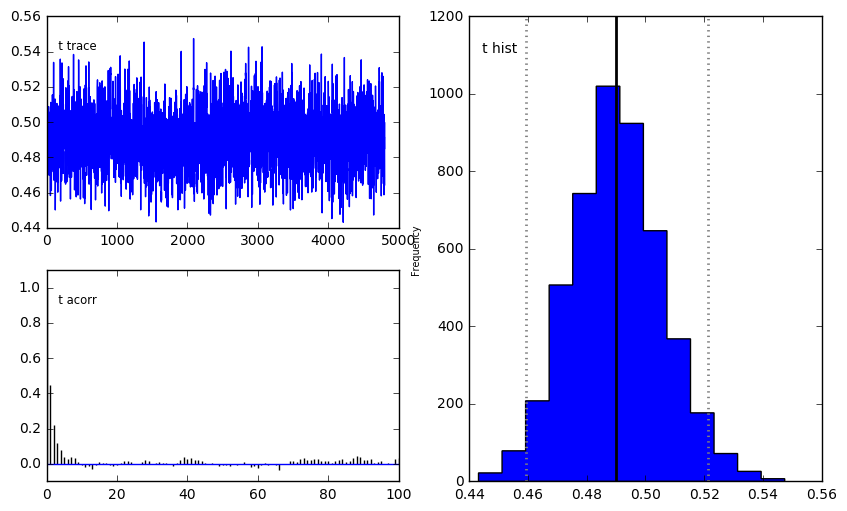

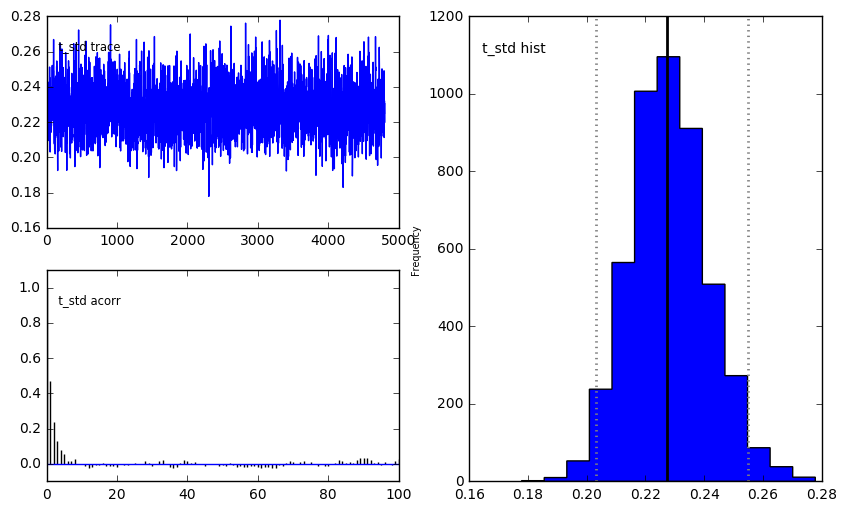

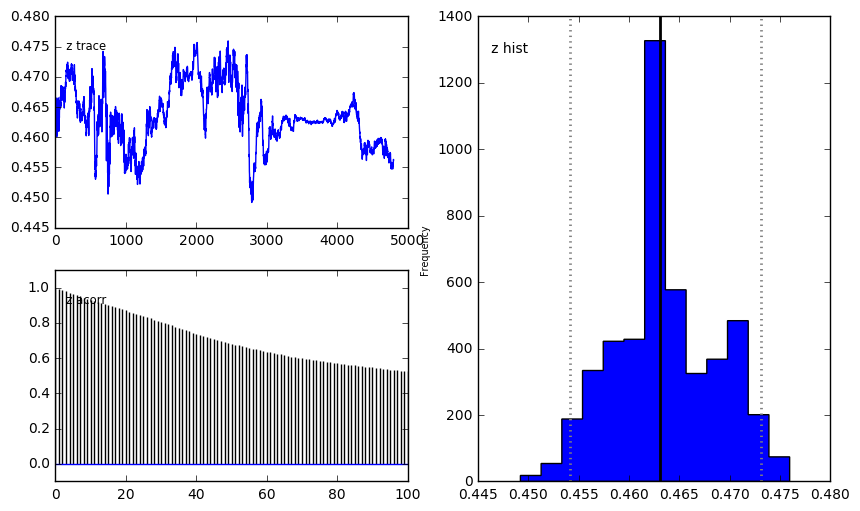

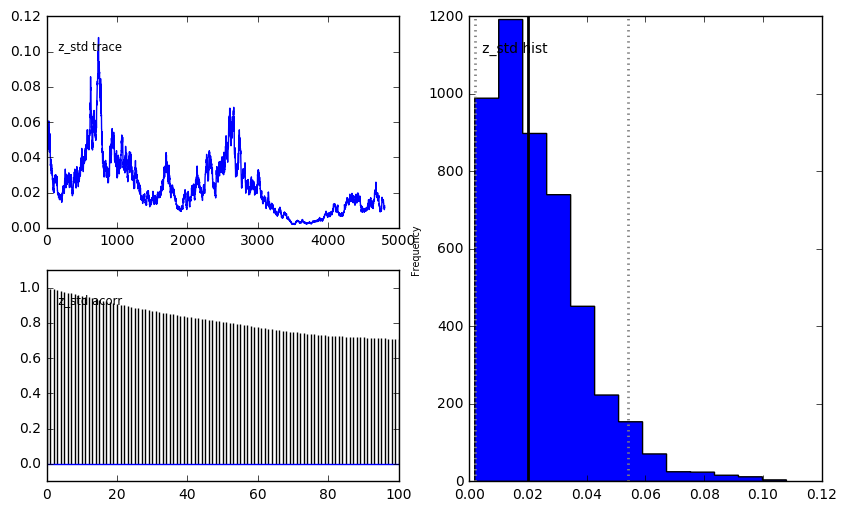

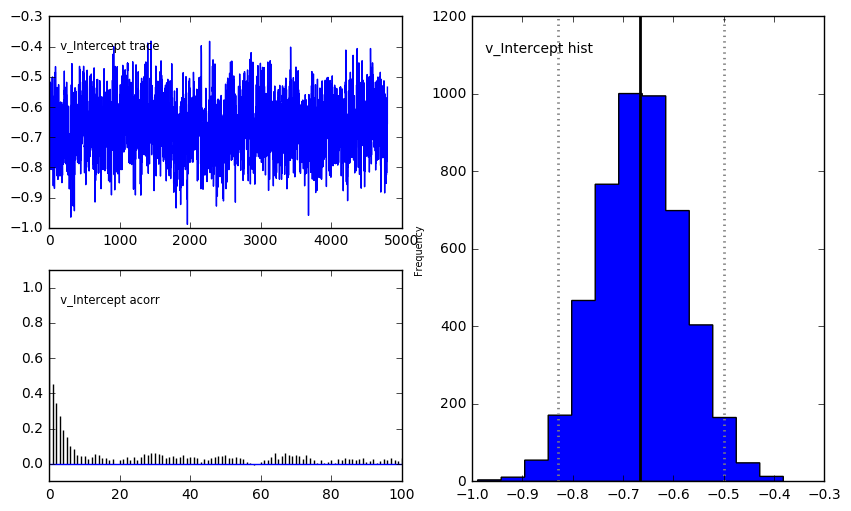

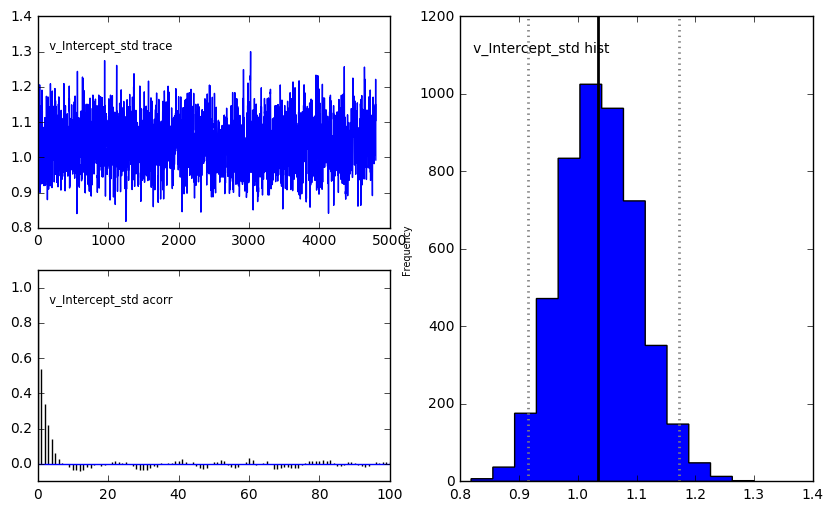

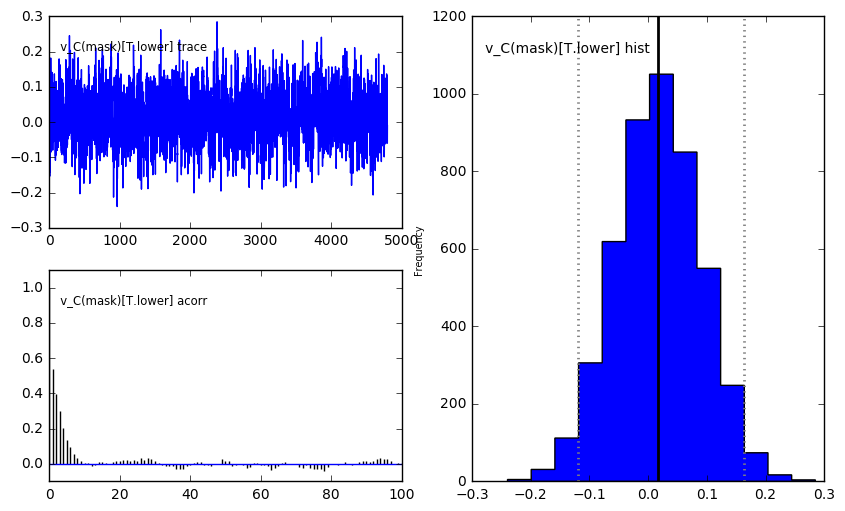

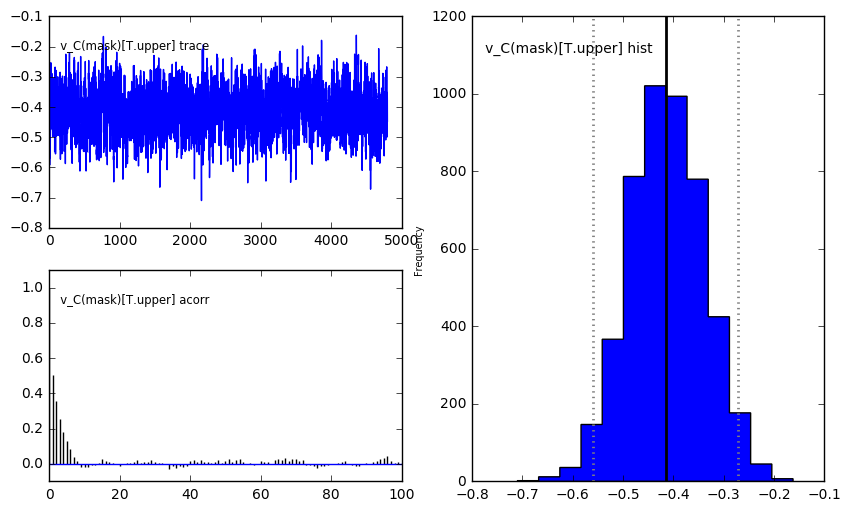

In [14]:
# run model
m_da.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_da.print_stats()
m_da.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std       2.5q        25q  \
a                                   1.62513  0.0393862    1.55098    1.59868   
a_std                              0.465721  0.0358301   0.399933   0.440842   
a_subj.09coqg8hlpux6fe              1.64418   0.357648    1.08411    1.38967   
a_subj.0b3t2skj9mlhbkn              1.34451   0.222691    0.98144    1.18721   
a_subj.0bcg7mtj2n1jjw9              2.26023   0.324177    1.70852    2.02627   
a_subj.0s53r30oouek89b              2.11999   0.316271    1.60059    1.89559   
a_subj.0uj9gbhag3o1w1v              1.72805   0.275384    1.26617    1.52918   
a_subj.17nzn4k8r1qkmrn              1.39961   0.232747    1.01529    1.23402   
a_subj.1fdkw2qjx3hc3lk              1.90881   0.280769    1.43122    1.71147   
a_subj.1mla0dmotqefnav               2.5347   0.385346    1.90395    2.25522   
a_subj.23hr9tl84h3zhw3              2.17167   0.254246    1.72999    1.99117   
a_subj.27muqwvalwne26r               1.7

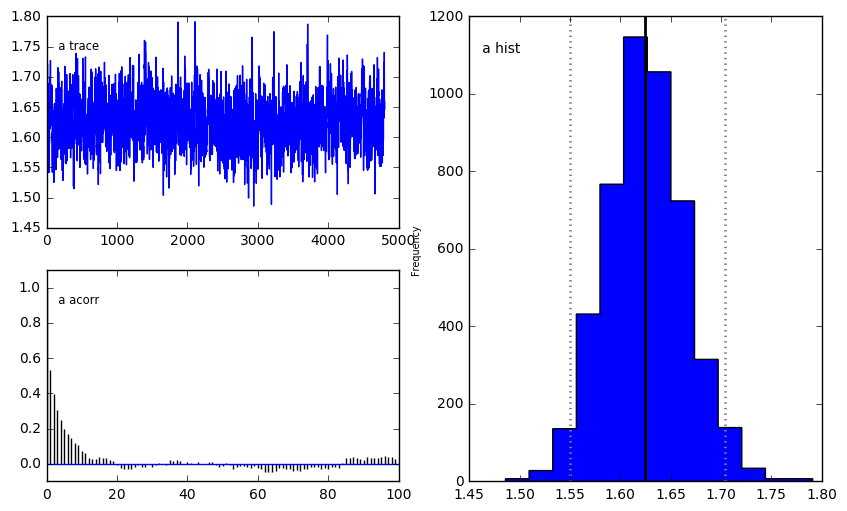

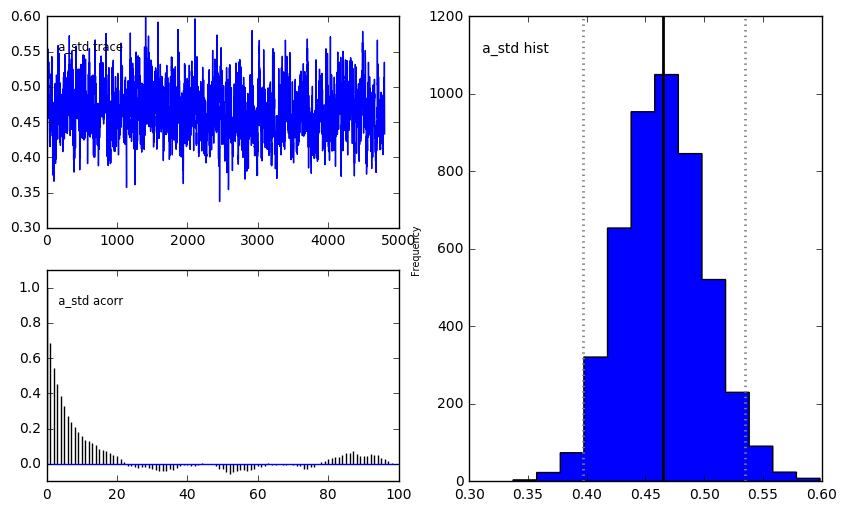

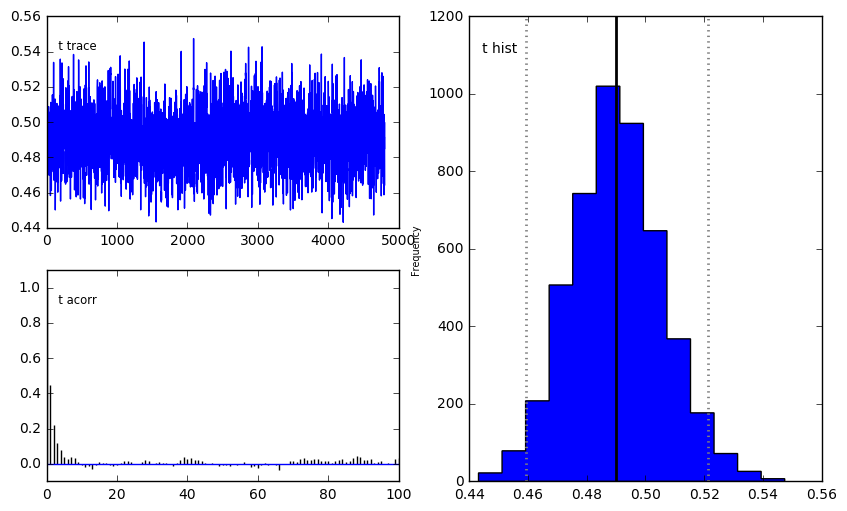

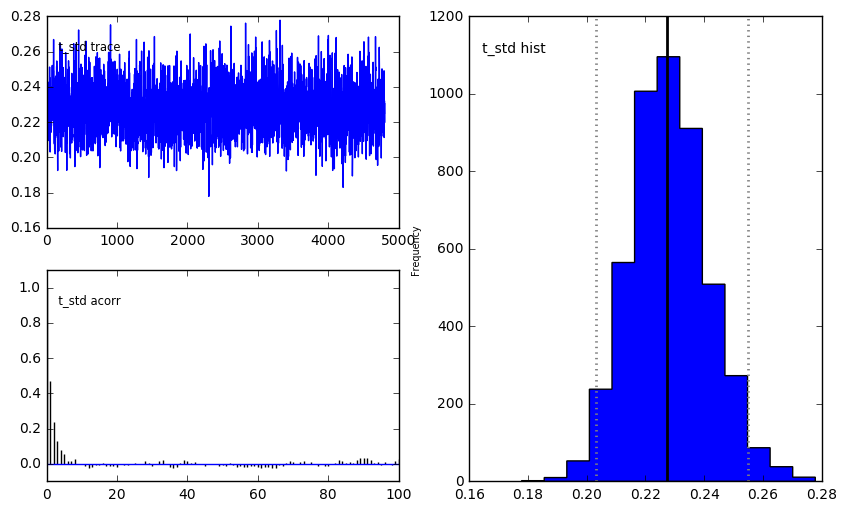

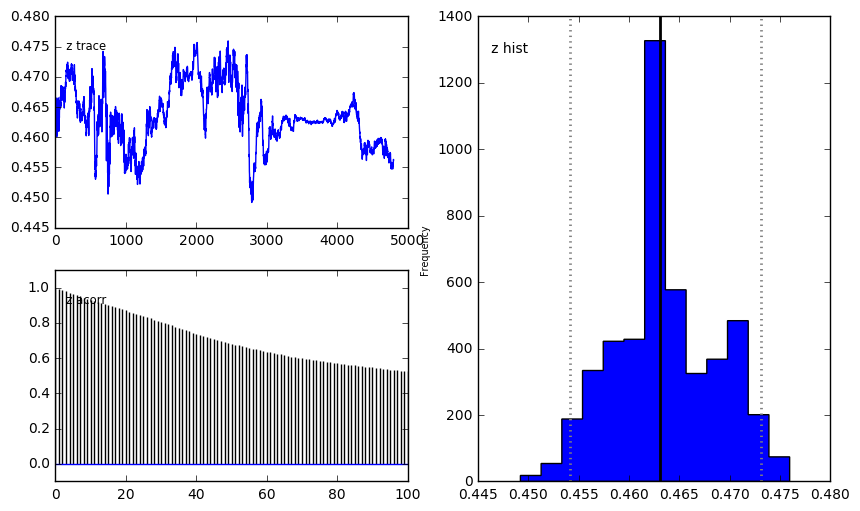

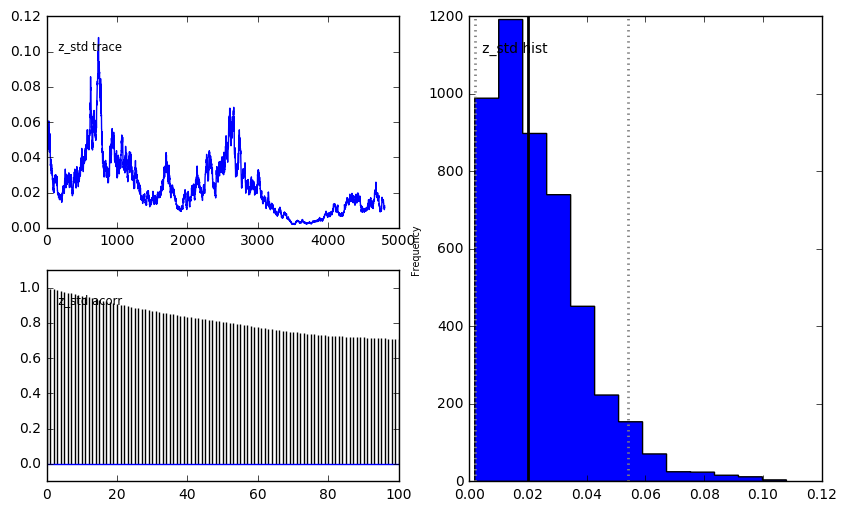

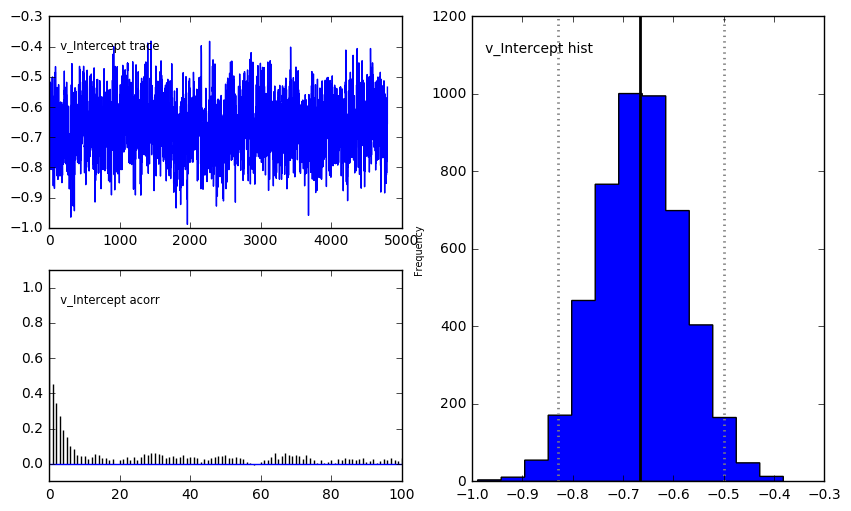

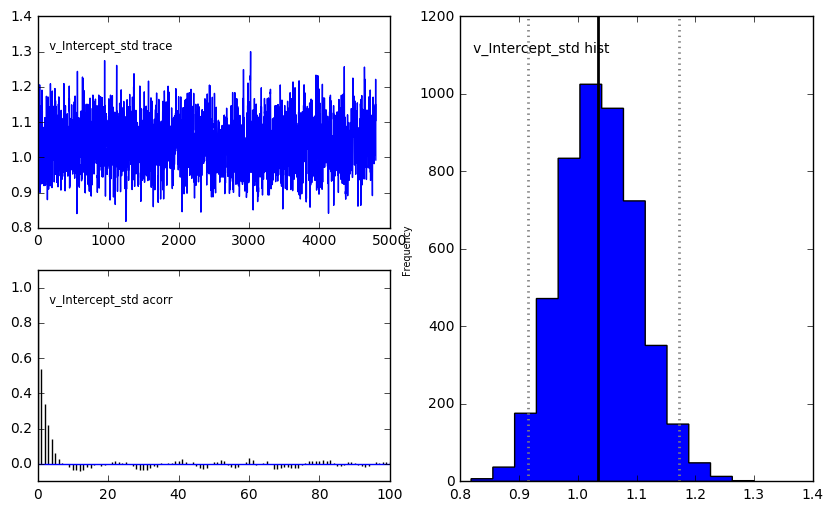

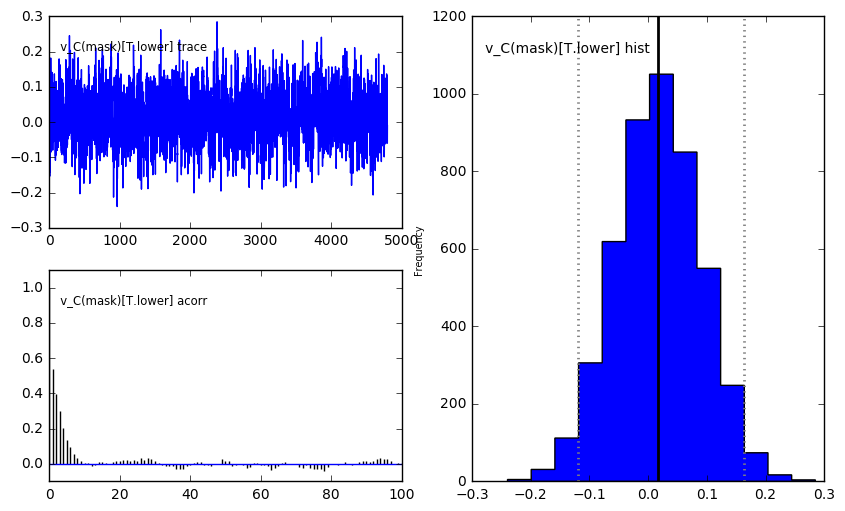

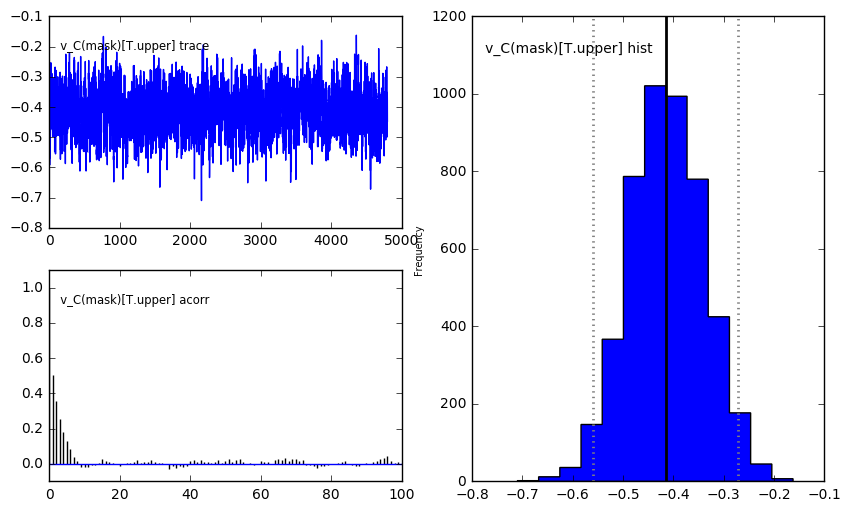

In [23]:
# save model stats
da_stats = m_da.gen_stats()
print(da_stats)
da_stats.to_csv('da_5000/faceMask_hddm_drift_maskFalsePositives_da_5000.csv', index=True)

# save model posterior plots
m_da.plot_posteriors(path='da_5000/_posteriors', save=True)

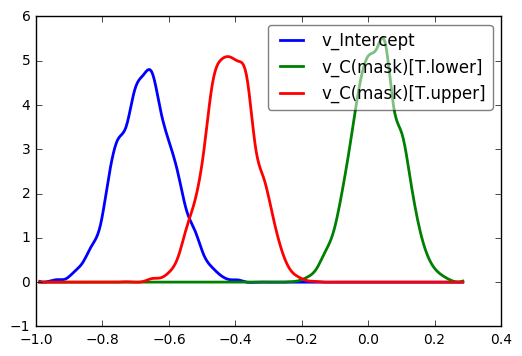

In [24]:
# plot model posteriors by mask
da_v_none, da_v_lower, da_v_upper = m_da.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([da_v_none, da_v_lower, da_v_upper])
plt.savefig('da_5000/faceMask_hddm_drift_maskFalsePositives_da_5000_v_mask.pdf')

In [25]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(da_v_none < 0) = ", (da_v_none.trace() < 0).mean())
print("P(da_v_lower < 0) = ", (da_v_lower.trace() < 0).mean())
print("P(da_v_upper > 0) = ", (da_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(da_v_lower < da_v_upper) = ", (da_v_lower.trace() < da_v_upper.trace()).mean())

P(da_v_none < 0) =  1.0
P(da_v_lower < 0) =  0.405416666667
P(da_v_upper > 0) =  0.0
P(da_v_lower < da_v_upper) =  0.0


In [27]:
# subset dataset by emotion rating type (disgusted) and facial expression (fearful)
df_data = data.loc[(data['emotionRating'] == 'disgusted') & (data['expression'] == 'fearful')]
df_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
164,lbmmswtrr0mpvov,3,5,disgusted,164,_faces/WM09_F_X.jpg,WM09_F_X,WM09,W,M,fearful,baseline,0,-0.860635,0,0,100,0,0,0
171,lbmmswtrr0mpvov,3,5,disgusted,172,_faces/HF05_F_X.jpg,HF05_F_X,HF05,H,F,fearful,baseline,0,-0.924475,0,0,100,0,0,0
177,lbmmswtrr0mpvov,3,5,disgusted,178,_faces/AM11_F_X.jpg,AM11_F_X,AM11,A,M,fearful,baseline,0,-2.476210,0,0,100,0,0,0
181,lbmmswtrr0mpvov,3,5,disgusted,182,_faces/AM11_F_L.jpg,AM11_F_L,AM11,A,M,fearful,lower,0,-0.900660,0,0,50,0,0,0
184,lbmmswtrr0mpvov,3,5,disgusted,185,_faces/HF05_F_U.jpg,HF05_F_U,HF05,H,F,fearful,upper,1,1.364260,0,0,50,0,0,0
191,lbmmswtrr0mpvov,3,5,disgusted,192,_faces/HF05_F_L.jpg,HF05_F_L,HF05,H,F,fearful,lower,0,-0.900510,0,0,50,0,0,0
192,lbmmswtrr0mpvov,3,5,disgusted,193,_faces/WM09_F_U.jpg,WM09_F_U,WM09,W,M,fearful,upper,0,-0.812050,0,0,50,0,0,0
202,lbmmswtrr0mpvov,3,5,disgusted,203,_faces/WM09_F_L.jpg,WM09_F_L,WM09,W,M,fearful,lower,0,-0.674805,0,0,50,0,0,0
203,lbmmswtrr0mpvov,3,5,disgusted,204,_faces/AM11_F_U.jpg,AM11_F_U,AM11,A,M,fearful,upper,1,1.907575,0,0,50,0,0,0
381,mr81dhy9r5lxu8r,1,6,disgusted,59,_faces/HF04_F_U.jpg,HF04_F_U,HF04,H,F,fearful,upper,0,-0.783000,0,0,50,0,0,0


In [28]:
# drop any subjects missing columns in design matrix (otherwise produces error) 
df_data = df_data[(df_data.subj_idx != 'jkgqk1co77rw24c') & (df_data.subj_idx != 'me8doxrmo9vj9dx') & (df_data.subj_idx != 'xs5439nm2v85thb')]

In [29]:
# define model
m_df = hddm.HDDMRegressor(df_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 39712.2 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean        std        2.5q         25q         50q        75q       97.5q       mc err
a                                    1.65451  0.0355021     1.58457     1.63069     1.65394    1.67754     1.72544   0.00105859
a_std                                0.42813  0.0321125    0.367769    0.406341     0.42754    0.44867    0.494814    0.0011009
a_subj.09coqg8hlpux6fe               1.38942   0.214156      1.0218      1.2395     1.37162     1.5181     1.87099   0.00469133
a_subj.0b3t2skj9mlhbkn               1.57792   0.243647     1.16788     1.40245     1.55471    1.73041     2.12179   0.00563032
a_subj.0bcg7mtj2n1jjw9               2.19455   0.354275     1.58522     1.93981     2.16083    2.41356     2.96654   0.00830232
a_subj.0s53r30oouek89b               2.30254   0.341189      1.7221     2.05709     2.27809    2.51616     3.03679   0.00706378
a_subj.0uj9gbhag3o1w1v               2.20472   0.311224     1.67631     1.98127      2.1796    2.39308  

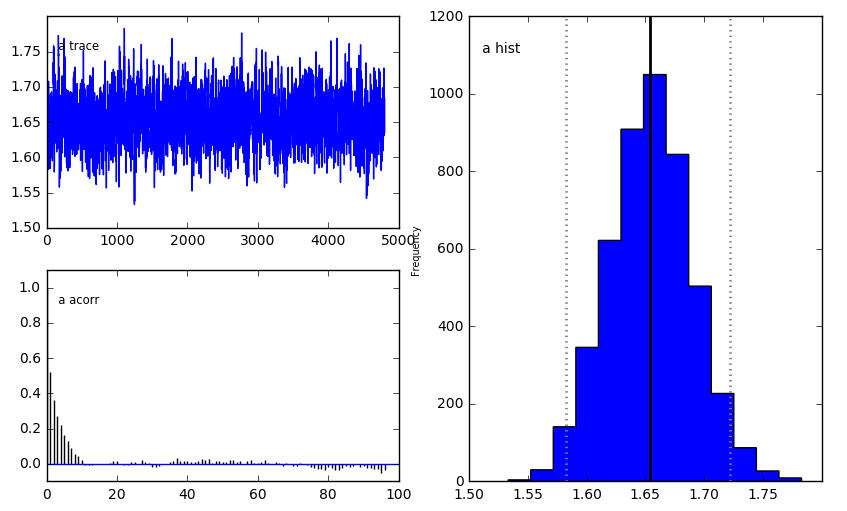

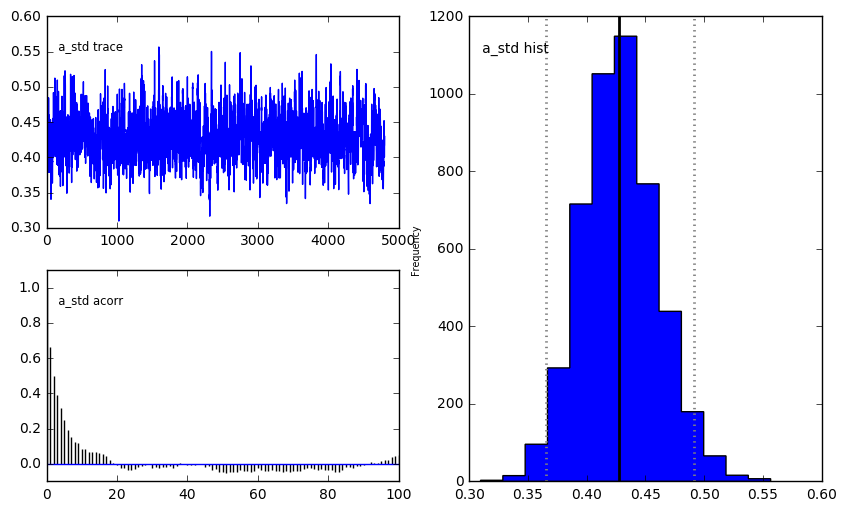

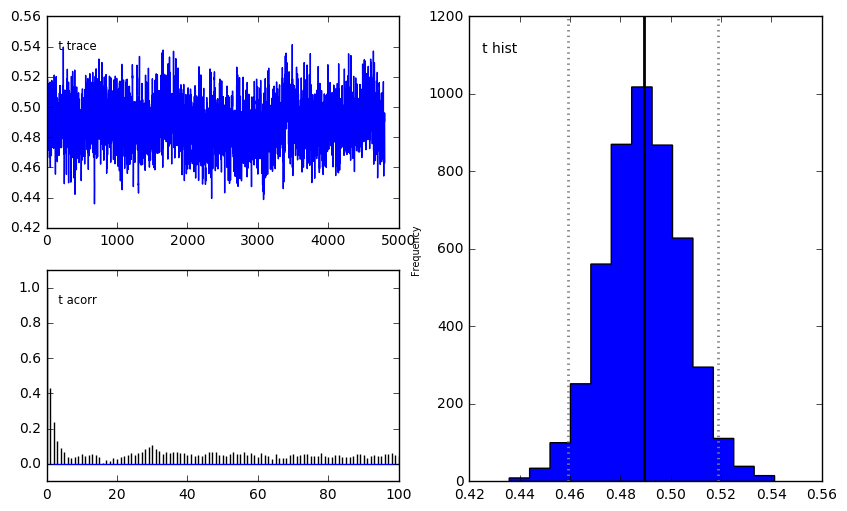

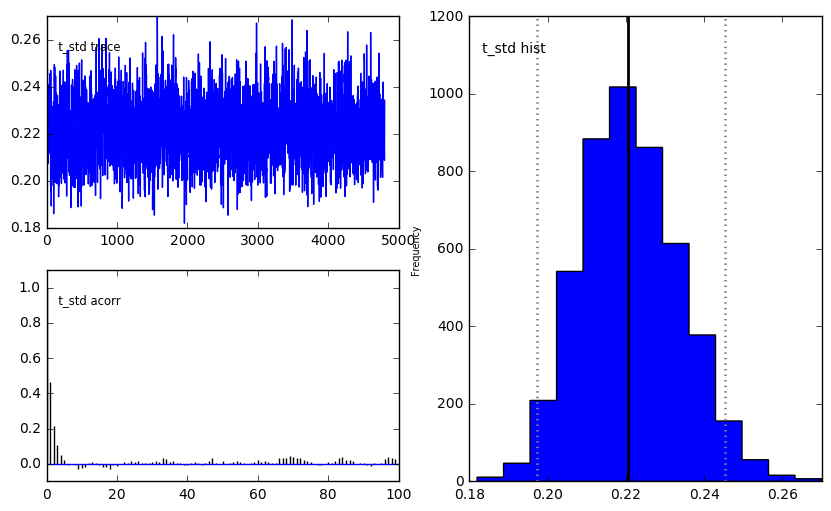

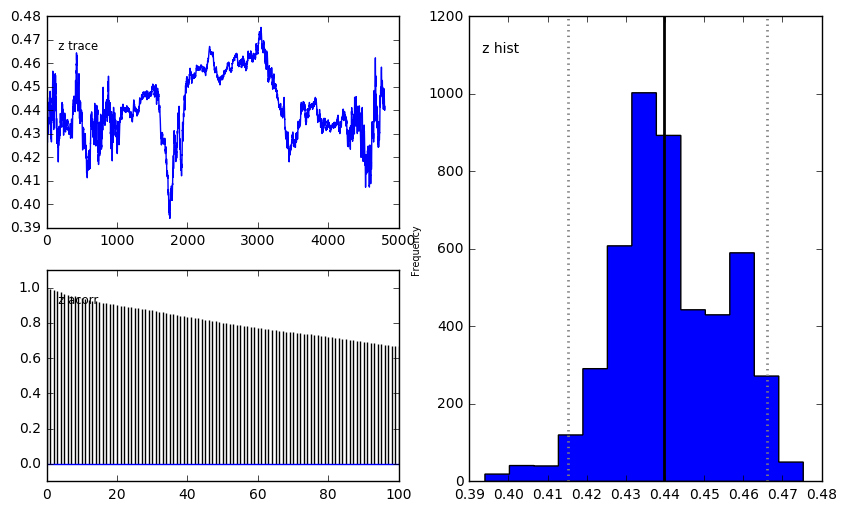

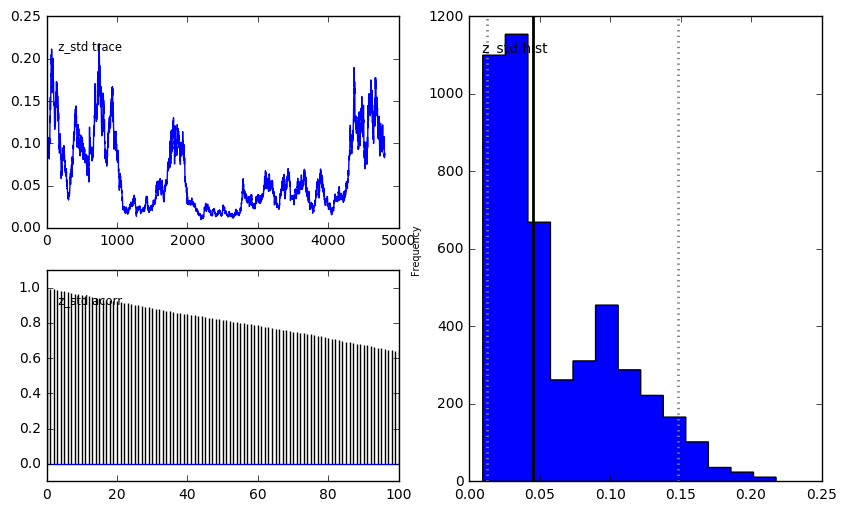

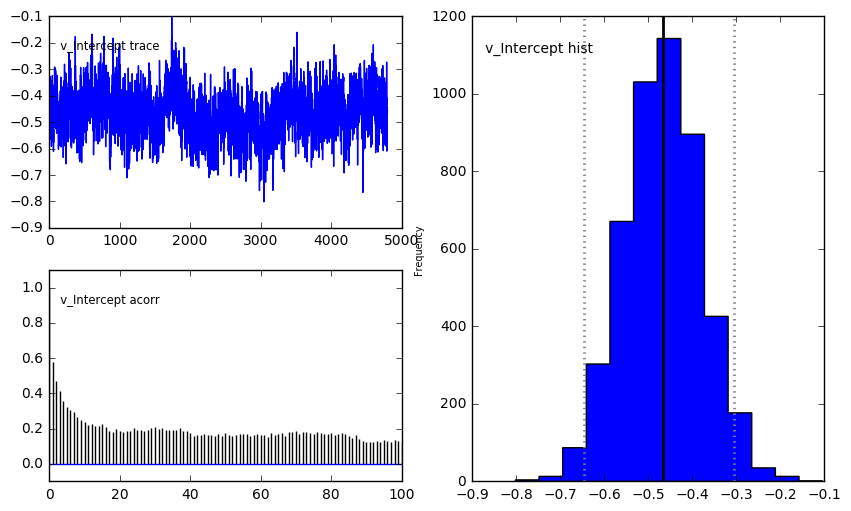

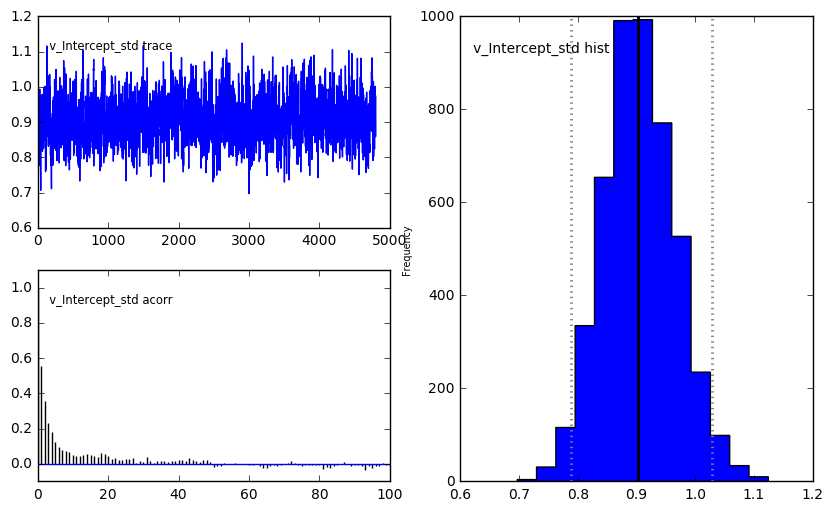

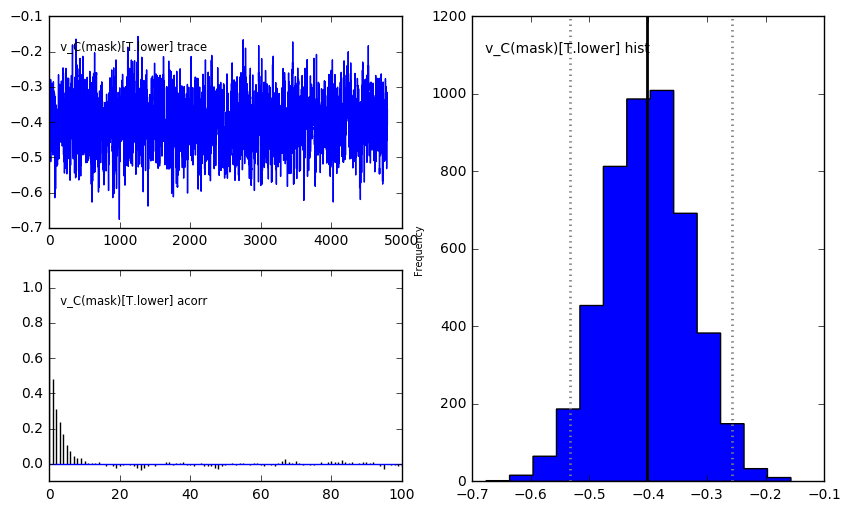

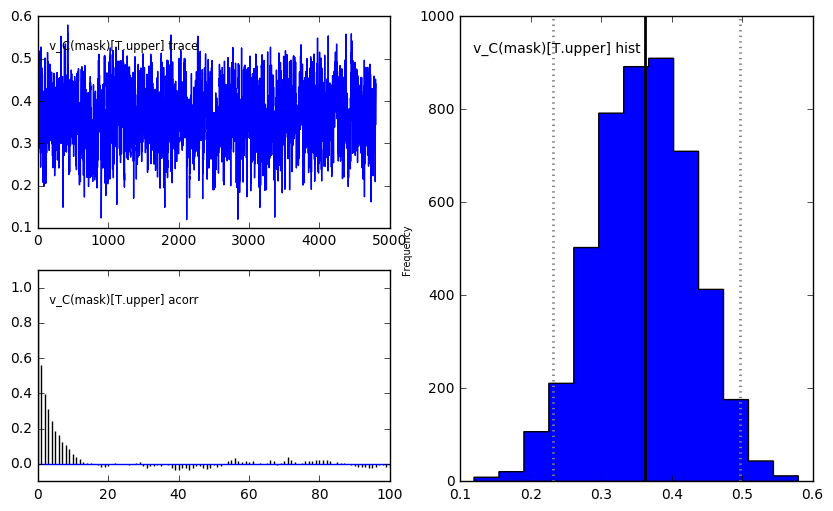

In [30]:
# run model
m_df.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_df.print_stats()
m_df.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                      mean        std      2.5q        25q  \
a                                  1.65451  0.0355021   1.58457    1.63069   
a_std                              0.42813  0.0321125  0.367769   0.406341   
a_subj.09coqg8hlpux6fe             1.38942   0.214156    1.0218     1.2395   
a_subj.0b3t2skj9mlhbkn             1.57792   0.243647   1.16788    1.40245   
a_subj.0bcg7mtj2n1jjw9             2.19455   0.354275   1.58522    1.93981   
a_subj.0s53r30oouek89b             2.30254   0.341189    1.7221    2.05709   
a_subj.0uj9gbhag3o1w1v             2.20472   0.311224   1.67631    1.98127   
a_subj.17nzn4k8r1qkmrn             1.93535   0.299625   1.41219    1.72612   
a_subj.1fdkw2qjx3hc3lk             1.36105   0.255609  0.954112    1.17302   
a_subj.1mla0dmotqefnav             1.94372   0.315363   1.41688    1.71678   
a_subj.23hr9tl84h3zhw3             2.18983   0.261447   1.72622    2.00766   
a_subj.27muqwvalwne26r             2.11574   0.270157   1.65587 

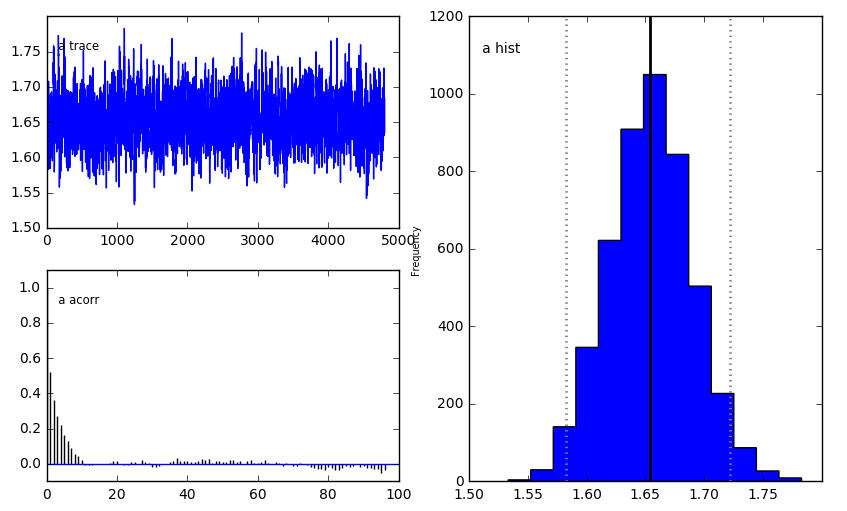

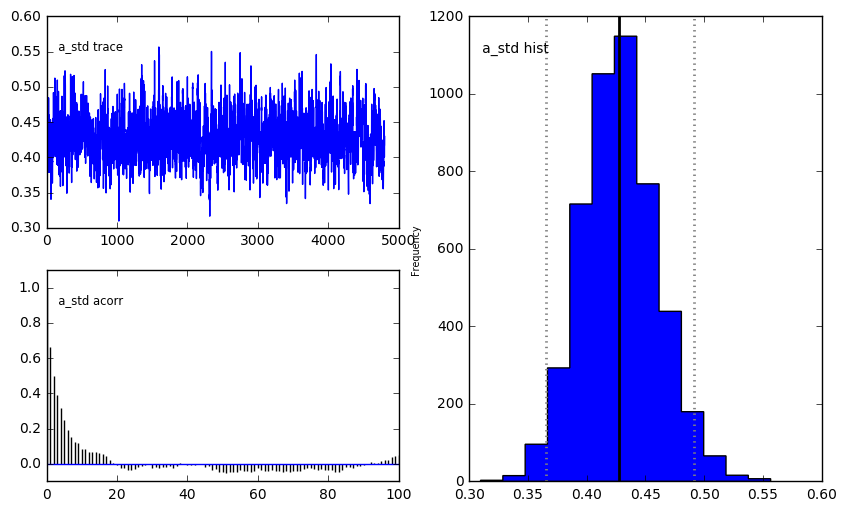

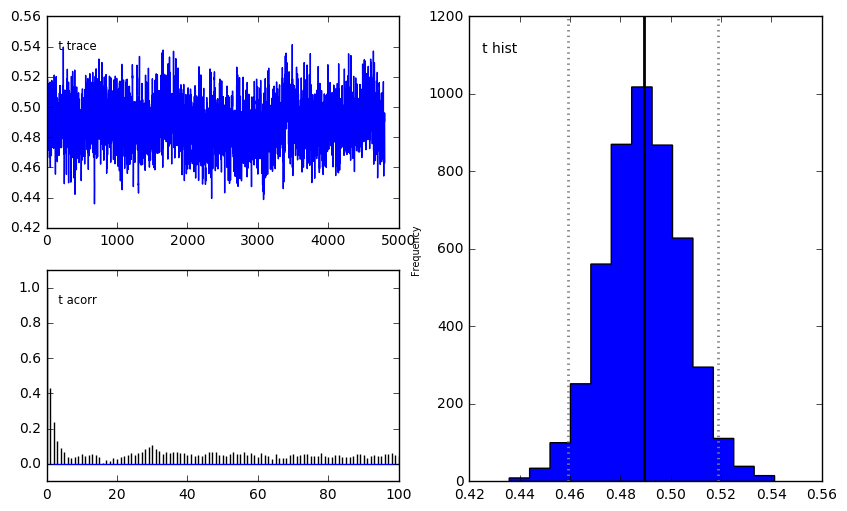

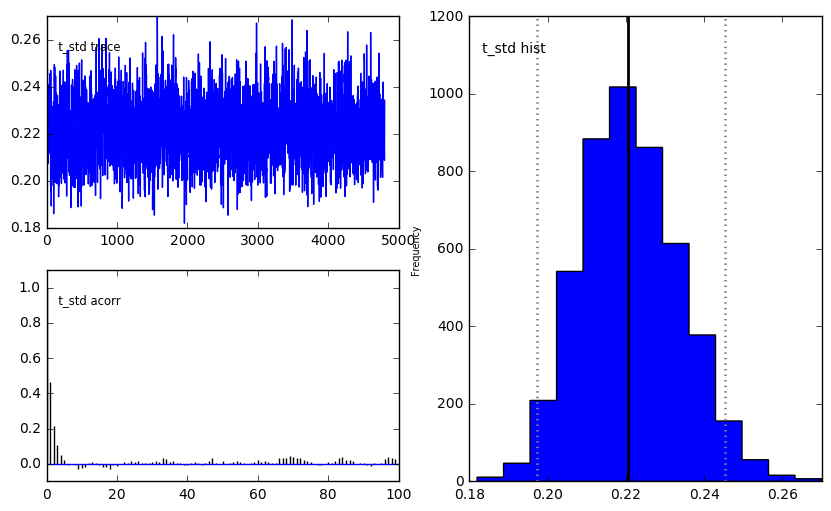

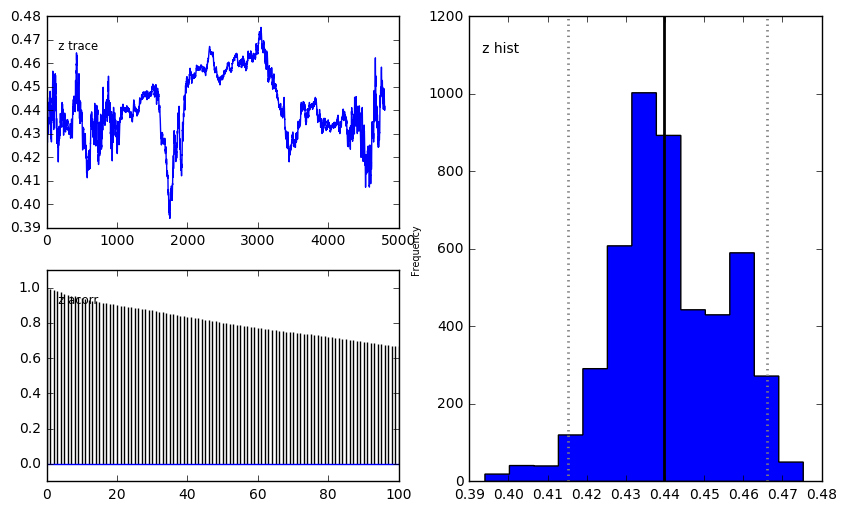

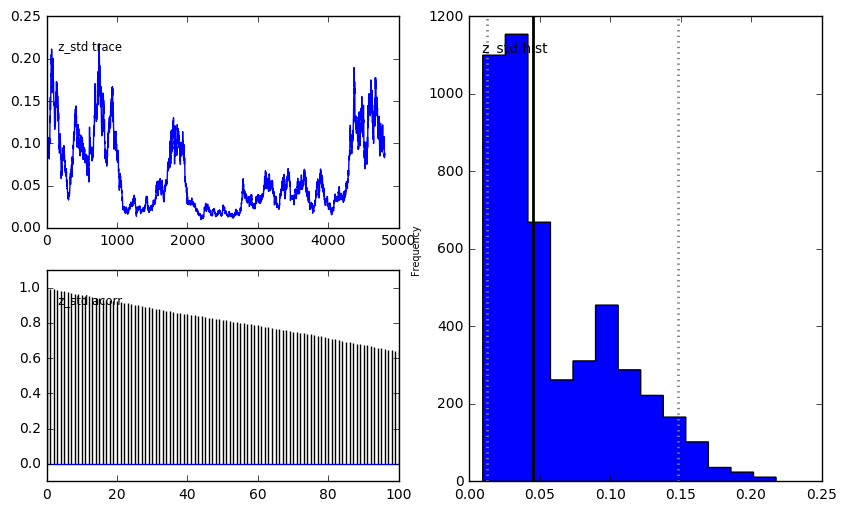

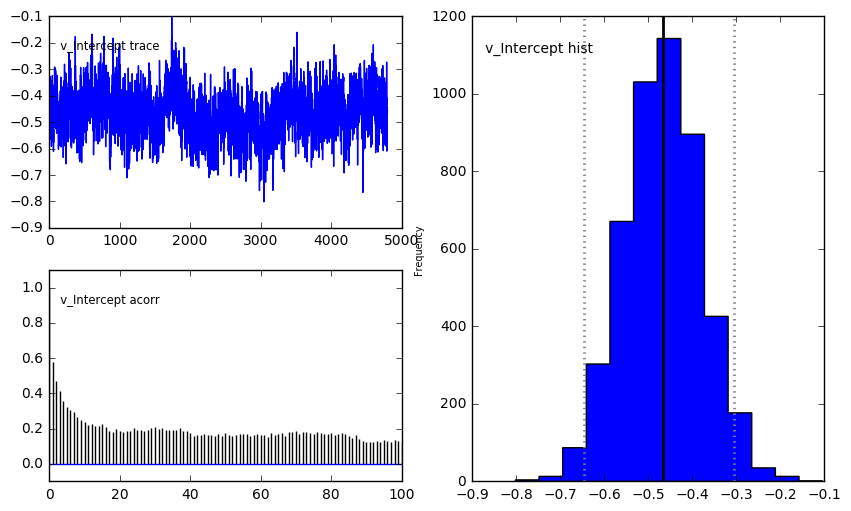

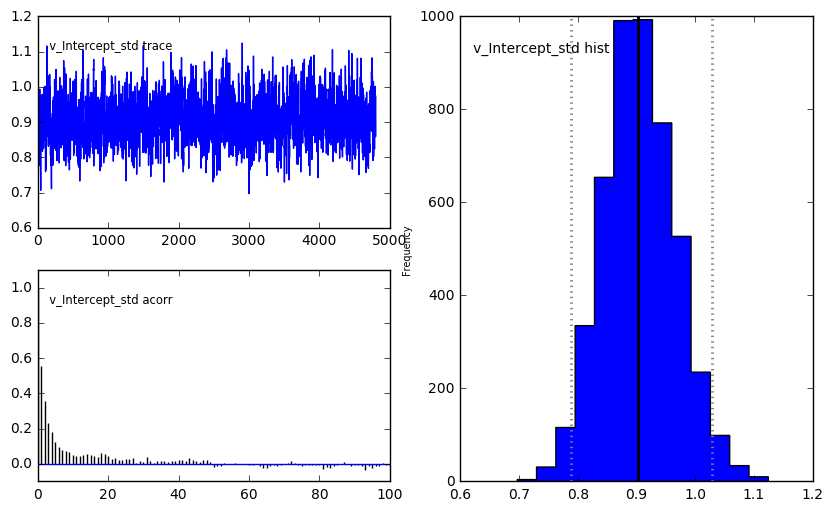

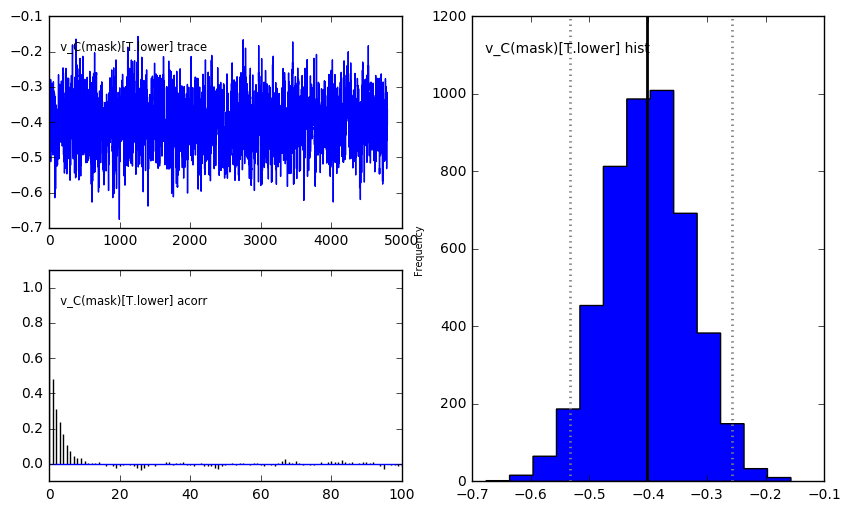

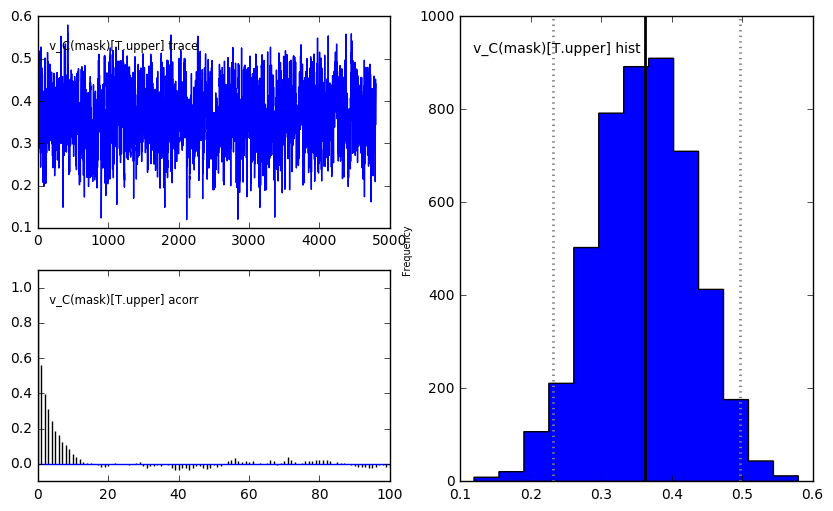

In [31]:
# save model stats
df_stats = m_df.gen_stats()
print(df_stats)
df_stats.to_csv('df_5000/faceMask_hddm_drift_maskFalsePositives_df_5000.csv', index=True)

# save model posterior plots
m_df.plot_posteriors(path='df_5000/_posteriors', save=True)

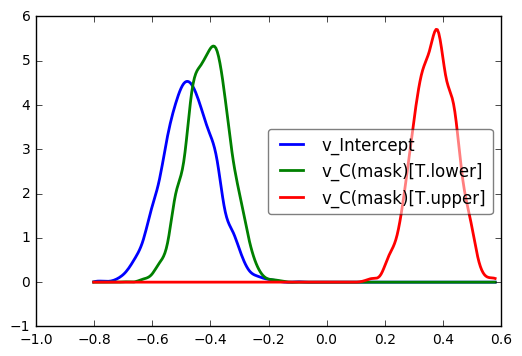

In [32]:
# plot model posteriors by mask
df_v_none, df_v_lower, df_v_upper = m_df.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([df_v_none, df_v_lower, df_v_upper])
plt.savefig('df_5000/faceMask_hddm_drift_maskFalsePositives_df_5000_v_mask.pdf')

In [33]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(df_v_none < 0) = ", (df_v_none.trace() < 0).mean())
print("P(df_v_lower < 0) = ", (df_v_lower.trace() < 0).mean())
print("P(df_v_upper > 0) = ", (df_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(df_v_lower < df_v_upper) = ", (df_v_lower.trace() < df_v_upper.trace()).mean())

P(df_v_none < 0) =  1.0
P(df_v_lower < 0) =  1.0
P(df_v_upper > 0) =  1.0
P(df_v_lower < df_v_upper) =  1.0
